In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import math
import sys
from os.path import join
import os

In [2]:
# Import Internal Modules 
sys.path.append(os.path.abspath('..'))

from utils_basic import SPECTROGRAM_DIR as indir
from utils_plot import plot_geo_total_psd_to_bin_array_spectrogram, save_figure

print("initializing file")

initializing file


In [3]:
window = 72
threshold = 345
station = 'A01'

In [4]:
bin_specs_arr = np.load(f'/fp/projects01/ec332/data/altered_spectrograms/bin_spec_no_res_{window}_{threshold}.npz')['spectrograms']

In [ ]:
# full_power_spectrograms_path = f'/fp/projects01/ec332/data/altered_spectrograms/power_spec_{station}_{window}_{threshold}.npz'
# full_power_data = np.load(full_power_spectrograms_path, allow_pickle=True)
# full_power_spectrograms = full_power_data['spectrograms']

In [7]:
bin_specs_arr[0]

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [67]:
list_of_objects = []
example_object = np.array([[1,2],[1,3],[1,4],[1,5],[4,100],[25,39]])

In [96]:
def generate_segment_plot(segment):
    segment = np.array(segment)
    start = min(segment[:,1])
    end = max(segment[:,1])
    size = end - start + 2
    array = np.zeros([200,size])  
    for coordinate in segment:
        print(coordinate[0],coordinate[1]-start)
        array[coordinate[0],coordinate[1]-start] = 1
    plt.figure(figsize = (6,6))
    plt.imshow(array)
# generate_segment_plot(example_object)

In [97]:
print(list(range(3)))

[0, 1, 2]


In [116]:
def get_true_neighbors(coordinate,object,image):
    true_neighbors = []
    if len(object) < 5:
        start_x = coordinate[0]-1
        start_y = coordinate[1]-1
        if start_x < 0:
            start_x = 0
        if start_y < 0:
            starty_y = 0
        start_check = [start_x, start_y]
        for i in range(3):
            for j in range(3):
                x_check = i+start_x
                y_check = j+start_y
                try:
                    if image[x_check,y_check]:
                        true_neighbors.append([x_check,y_check])
                except:
                    print('out of bounds')
    elif len(object) >=5:
        start_x = coordinate[0]-2
        start_y = coordinate[1]-2
        if start_x < 0:
            start_x = 0
        if start_y < 0:
            starty_y = 0
        start_check = [start_x, start_y]
        for i in range(5):
            for j in range(5):
                x_check = i+start_x
                y_check = j+start_y
                try:
                    if image[x_check,y_check]:
                        true_neighbors.append([x_check,y_check])
                except:
                    print('out of bounds')
    for neighbor in true_neighbors:
        if neighbor not in object:
            object.append(neighbor)

In [117]:
def remove_object_from_image(object,image):
    new_image = image
    for coordinate in object:
        new_image[coordinate[0],coordinate[1]] = False
    return new_image

In [118]:
def create_object(image):
    find_pixel = False
    image = np.array(image)
    object = []
    for i, row in enumerate(image):
        for j, pixel in enumerate(row):
            if pixel == True:
                object.append([i,j])
                find_pixel = True
                break
        if find_pixel:
            break

    for i,coordinate in enumerate(object):
        get_true_neighbors(coordinate,object,image)
    new_image = remove_object_from_image(object,image)
    return object, new_image

In [119]:
object, new_image = create_object(bin_specs_arr[1])

In [136]:
object_list = []
new_image = bin_specs_arr[0]
for i in range(1000):
    object, new_image = create_object(new_image)
    if len(object) > 10:
        object_list.append(object)

out of bounds
out of bounds
out of bounds


In [137]:
object_list

[[[24, 48],
  [24, 49],
  [24, 50],
  [25, 50],
  [24, 51],
  [24, 52],
  [24, 53],
  [24, 54],
  [24, 55],
  [24, 56],
  [24, 57],
  [24, 58],
  [24, 59]]]

24 0
24 1
24 2
25 2
24 3
24 4
24 5
24 6
24 7
24 8
24 9
24 10
24 11


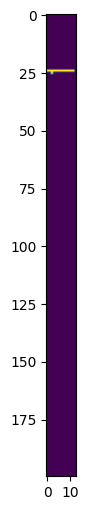

In [139]:
generate_segment_plot(object_list[0])

In [ ]:
def generate_segment_plot(segment):
    start = min(segment[:,1])
    end = max(segment[:,1])
    size = end - start + 2
    array = np.zeros([200,size])  
    for coordinate in segment:
        print(coordinate[0],coordinate[1]-start)
        array[coordinate[0],coordinate[1]-start] = 1
    plt.figure(figsize = (6,6))
    plt.imshow(array)
# generate_segment_plot(example_object)

In [71]:
object = [5]
for i,coordinate in enumerate(object):
    object.append(i)
    if len(object) >50:
        break